## Povprečne mesečne plače po občinah

### Projek pri podatkovnem rudarjenju

Podatkovno rudarjenje, projekt, `2. 3. 2020`  
**`Domen Ramšak`** **`Anže Grintal Ugovšek`**

Izbran problem (oziroma zbirka podatkov) je Povprečne mesečne plače po občinah, Slovenija, letno.

Problem zajema povprečne bruto in neto plače po občinah v Sloveniji, z dodatnimi podatki kot so opravljene (oz. plačane) nadure, število oseb, ki so opravljale nadure na mesec, število oseb, ki so prejele zaostala izplačila itd.

### Podatki



In [251]:
import pandas as pd
import numpy as np
import scipy
from matplotlib import pyplot as plt

data = pd.read_excel('podatki/0772615.xlsx', index_col=0, header=1)  

data = data.drop(["Ankaran", "Mirna"])
data = data.replace(r'-','0').astype(np.float64)

In [2]:
povpMesecnaPlacaNeto = data.iloc[:, 15:30]
indeksPovpMesecnaPlacaNeto = data.iloc[:, 45:60]
povpPlacaNadure = data.iloc[:, 60:75]
povpMesecnaPlacaNetoUra = data.iloc[:, 90:105]
indeksPovpMesecnaPlacaNetoUra = data.iloc[:, 120:135]
osebeZaostalaPlacila = data.iloc[:, 135:150]
osebeNadure = data.iloc[:, 150:165]

In [3]:
count = 0
for h in range(2005, 2020):
    povpMesecnaPlacaNeto = povpMesecnaPlacaNeto.rename(columns={povpMesecnaPlacaNeto.columns[count]: h})
    indeksPovpMesecnaPlacaNeto = indeksPovpMesecnaPlacaNeto.rename(columns={indeksPovpMesecnaPlacaNeto.columns[count]: h})
    povpPlacaNadure = povpPlacaNadure.rename(columns={povpPlacaNadure.columns[count]: h})
    povpMesecnaPlacaNetoUra = povpMesecnaPlacaNetoUra.rename(columns={povpMesecnaPlacaNetoUra.columns[count]: h})
    indeksPovpMesecnaPlacaNetoUra = indeksPovpMesecnaPlacaNetoUra.rename(columns={indeksPovpMesecnaPlacaNetoUra.columns[count]: h})
    osebeZaostalaPlacila = osebeZaostalaPlacila.rename(columns={osebeZaostalaPlacila.columns[count]: h})
    osebeNadure = osebeNadure.rename(columns={osebeNadure.columns[count]: h})
    count+=1
    
indeksPovpMesecnaPlacaNetoUra = indeksPovpMesecnaPlacaNetoUra.drop(columns=2005)

### Predstavitev podatkov

In [237]:
df = pd.DataFrame(columns=range(2005, 2020))
df.insert(0, "", "")
df = df.set_index("")

for l in range(2005, 2020):
    cache = povpMesecnaPlacaNeto.sort_values(l, ascending=0)
    
    for i in range(0, 3):
        if(cache.iloc[:, 0].index[i] not in df.index):
            df = df.append(cache.iloc[i, :])
    
    
for l in range(2005, 2020):
    cache = povpMesecnaPlacaNeto.sort_values(l, ascending=0)
    
    for i in range(0, len(df.index)):
        if(df.iloc[i, l-2005] not in cache[l].head(3).values):
            df.at[df.iloc[:, 0].index[i], l] = 0

def h_max(s):
    is_max = s == s.max()
    return ['background-color: #FF6200' if v else '' for v in is_max]

def h_max2(s):
    is_max = s == s.nlargest(3).to_numpy()[1]
    return ['background-color: #FD9346' if v else '' for v in is_max]

def h_max3(s):
    is_max = s == s.nlargest(3).to_numpy()[2]
    return ['background-color: #FDB777' if v else '' for v in is_max]

df = df.round(2)
df.style.apply(h_max).apply(h_max2).apply(h_max3).format('{0:,.2f}')



,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
,,,,,,,,,,,,,,,
Cerklje na Gorenjskem,994.07,"1,028.63","1,065.88","1,179.98","1,147.61","1,173.70","1,182.71","1,187.71","1,378.65","1,393.08","1,431.88","1,404.53","1,438.70","1,445.17","1,433.90"
Kobilje,857.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Ljubljana,848.09,889.75,963.60,"1,042.35","1,081.27","1,106.95","1,125.64","1,124.97","1,125.61","1,130.74","1,140.33","1,159.83","1,197.56","1,231.47","1,281.66"
Sveta Ana,0.00,886.28,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Dol pri Ljubljani,0.00,0.00,955.73,"1,066.81",0.00,"1,066.37","1,119.90","1,120.90",0.00,0.00,0.00,0.00,0.00,0.00,0.00
Sveti Tomaž,0.00,0.00,0.00,0.00,"1,052.42",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Novo mesto,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"1,116.34","1,145.87","1,138.56","1,149.06","1,173.36","1,217.78","1,286.19"


In [250]:
povpMesecnaPlacaNeto.loc[["SLOVENIJA", "Cerklje na Gorenjskem"],:]

,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
SLOVENIJA,735.73,773.42,834.50,899.80,930.00,966.62,987.39,991.44,997.01,1005.41,1013.23,1030.16,1062.0,1092.74,1133.5
Cerklje na Gorenjskem,994.07,1028.63,1065.88,1179.98,1147.61,1173.70,1182.71,1187.71,1378.65,1393.08,1431.88,1404.53,1438.7,1445.17,1433.9


Text(0, 0.5, 'Povp. neto plača v €')

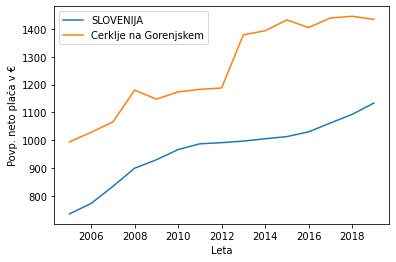

In [256]:
ax = povpMesecnaPlacaNeto.loc[["SLOVENIJA", "Cerklje na Gorenjskem"],:].transpose().plot()
ax.set_xlabel("Leta")
ax.set_ylabel("Povp. neto plača v €")

In [258]:
df = pd.DataFrame(columns=range(2005, 2020))
df.insert(0, "", "")
df = df.set_index("")

for l in range(2005, 2020):
    cache = povpPlacaNadure.sort_values(l, ascending=0)
    
    for i in range(0, 3):
        if(cache.iloc[:, 0].index[i] not in df.index):
            df = df.append(cache.iloc[i, :])
    
    
for l in range(2005, 2020):
    cache = povpPlacaNadure.sort_values(l, ascending=0)
    
    for i in range(0, len(df.index)):
        if(df.iloc[i, l-2005] not in cache[l].head(3).values):
            df.at[df.iloc[:, 0].index[i], l] = 0

def h_max(s):
    is_max = s == s.max()
    return ['background-color: #FF6200' if v else '' for v in is_max]

def h_max2(s):
    is_max = s == s.nlargest(3).to_numpy()[1]
    return ['background-color: #FD9346' if v else '' for v in is_max]

def h_max3(s):
    is_max = s == s.nlargest(3).to_numpy()[2]
    return ['background-color: #FDB777' if v else '' for v in is_max]

df = df.round(2)
df.style.apply(h_max).apply(h_max2).apply(h_max3).format('{0:,.2f}')


,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
,,,,,,,,,,,,,,,
Velika Polana,21.07,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Sveti Andraž v Slov. goricah,14.91,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Šmartno ob Paki,11.27,13.47,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Cerklje na Gorenjskem,0.00,12.14,11.91,16.96,18.68,19.11,0.00,19.56,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Šempeter - Vrtojba,0.00,11.92,0.00,13.41,22.00,0.00,19.19,20.41,20.07,0.00,19.95,20.09,18.95,19.56,20.89
Vojnik,0.00,0.00,12.37,0.00,19.64,20.11,0.00,0.00,16.28,0.00,0.00,0.00,0.00,0.00,0.00
Ivančna Gorica,0.00,0.00,11.74,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Izola/Isola,0.00,0.00,0.00,13.81,0.00,0.00,17.43,17.13,16.80,0.00,0.00,17.70,17.18,17.99,0.00
Kostel,0.00,0.00,0.00,0.00,0.00,61.93,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [ ]:
for l in range(2005, 2020):
    cache = povpPlacaNadure.sort_values(l, ascending=0)
    
    print()